In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha = 3
x=sp.Symbol('x')
y=sp.Symbol('y')
fx1 =sp.sympify(x - sp.cos(y)-1)
fx2 =sp.sympify(y - sp.log(x+1)-alpha)

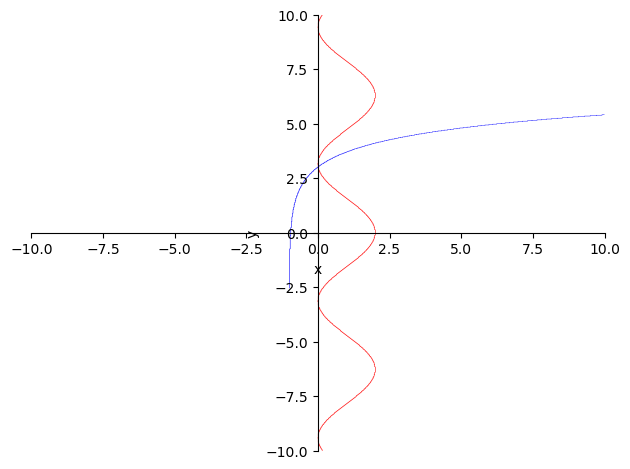

In [3]:
p1 = sp.plotting.plot_implicit(sp.Eq(fx1,0),(x,-10,10),(y,-10,10),show =False,line_color='red')
p2 = sp.plotting.plot_implicit(sp.Eq(fx2,0),(x,-10,10),(y,-10,10),show =False,line_color='blue')
p1.append(p2[0])
p1.show()

In [4]:
def IterationN(X0,fx1,fx2):
    A1 =[sp.N(fx1.subs([(x,X0[0]),(y,X0[1])])),sp.N(fx1.diff(y).subs([(x,X0[0]),(y,X0[1])])),
         sp.N(fx2.subs([(x,X0[0]),(y,X0[1])])),sp.N(fx2.diff(y).subs([(x,X0[0]),(y,X0[1])]))]
    A2 = [sp.N(fx1.diff(x).subs([(x,X0[0]),(y,X0[1])])),sp.N(fx1.subs([(x,X0[0]),(y,X0[1])])),
          sp.N(fx2.diff(x).subs([(x,X0[0]),(y,X0[1])])),sp.N(fx2.subs([(x,X0[0]),(y,X0[1])]))]
    J = [sp.N(fx1.diff(x).subs([(x,X0[0]),(y,X0[1])])),sp.N(fx1.diff(y).subs([(x,X0[0]),(y,X0[1])])),
         sp.N(fx2.diff(x).subs([(x,X0[0]),(y,X0[1])])),sp.N(fx2.diff(y).subs([(x,X0[0]),(y,X0[1])]))]
    if(Det(J)==0):
        print("матрица Якоби вырождена")
    X1 = [0,0]
    X1[0]=X0[0] - Det(A1)/Det(J)
    X1[1]=X0[1] - Det(A2)/Det(J)
    return X1

In [5]:
def Multiply(J,A):
    return [J[0]*A[0]+J[1]*A[1],J[2]*A[0]+J[3]*A[1]]

In [6]:
def IterationNM(X0,fx1,fx2):
    J = [sp.N(fx1.diff(x).subs([(x,X0[0]),(y,X0[1])])),sp.N(fx1.diff(y).subs([(x,X0[0]),(y,X0[1])])),
         sp.N(fx2.diff(x).subs([(x,X0[0]),(y,X0[1])])),sp.N(fx2.diff(y).subs([(x,X0[0]),(y,X0[1])]))]
    if(Det(J)==0):
        print("матрица Якоби вырождена")
    Jobr = [J[3]/Det(J),-1*J[1]/Det(J),-1*J[2]/Det(J),J[0]/Det(J)]
    A = Multiply(Jobr,[sp.N(fx1.subs([(x,X0[0]),(y,X0[1])])),sp.N(fx2.subs([(x,X0[0]),(y,X0[1])]))])
    return [X0[0] - A[0],X0[1] - A[1]]

In [7]:
def Det(A):
    return A[0]*A[3] - A[1]*A[2]

In [8]:
def Cond(A,B):
    out = [abs(A[0]-B[0]),abs(A[1]-B[1])]
    return max(out)

In [9]:
X0 = [0,2.5]
X1= [0,0]
k=0
epsilon = 0.01
cond = 100
while (cond > epsilon):
    k+=1 
    if(k>100):
        break
    X1 = IterationN(X0,fx1,fx2)
    cond = Cond(X1,X0)
    X0 = X1
print("amount of interation k=",k)
print("root1 =",X1)
print("convertion =",cond)

amount of interation k= 3
root1 = [0.00880766520482274, 3.00877226840565]
convertion = 0.00253362819773084


In [10]:
X0 = [0,2.5]
X1= [0,0]
k=0
epsilon = 0.01
cond = 100
while (cond > epsilon):
    k+=1 
    if(k>100):
        break
    X1 = IterationNM(X0,fx1,fx2)
    cond = Cond(X1,X0)
    X0 = X1
print("amount of interation k=",k)
print("root1 =",X1)
print("convertion =",cond)

amount of interation k= 3
root1 = [0.00880766520482274, 3.00877226840565]
convertion = 0.00253362819773084


In [11]:
#простая итерация
psix1 = sp.sympify(sp.cos(y)+1)
psix2 =sp.sympify(sp.log(x+1)+alpha)

In [12]:
def IterationI(X0,fx1,fx2):
    return [sp.N(fx1.subs([(x,X0[0]),(y,X0[1])])),sp.N(fx2.subs([(x,X0[0]),(y,X0[1])]))]

In [13]:
def Q(psix1,psix2,X0):
    q1 = abs(sp.N(psix1.diff(x).subs([(x,X0[0]),(y,X0[1])]))) + abs(sp.N(psix1.diff(y).subs([(x,X0[0]),(y,X0[1])])))
    q2 = abs(sp.N(psix2.diff(x).subs([(x,X0[0]),(y,X0[1])]))) + abs(sp.N(psix2.diff(y).subs([(x,X0[0]),(y,X0[1])])))
    q3 = abs(sp.N(psix1.diff(x).subs([(x,X0[0]),(y,X0[1])]))) + abs(sp.N(psix2.diff(x).subs([(x,X0[0]),(y,X0[1])])))
    q4 = abs(sp.N(psix1.diff(y).subs([(x,X0[0]),(y,X0[1])]))) + abs(sp.N(psix2.diff(y).subs([(x,X0[0]),(y,X0[1])])))
    return max(q1,q2,q3,q4)

In [14]:
X0 = [0.1,2.5]
X1= [0,0]
k=0
epsilon = 0.01
cond = 100
q= 0 
if(Q(psix1,psix2,[0.1,3])<1):
    q = Q(psix1,psix2,[0.1,3])
else:
    print("не выполняется необходимое условие")
while ((q/(1-q))*cond > epsilon):
    k+=1 
    if(k>100):
        break
    X1 = IterationI(X0,psix1,psix2)
    cond = Cond(X1,X0)
    X0 = X1
print("amount of interation k=",k)
print("root2 =",X1)
print("convertion =",cond)

amount of interation k= 8
root2 = [0.00882604654023167, 3.00862850259639]
convertion = 0.000160211117106290
